In [4]:
import pandas as pd
import pandas_datareader as dr
import matplotlib.pyplot as plt
import numpy as np
import warnings
from nsepy import get_history
from datetime import date
%matplotlib inline

In [7]:
#Getting Stock price data from yahoo finance using panda_datareader library
#Getting NIFTYIT Index value using nsepy library

TCS = dr.data.get_data_yahoo('TCS.NS', start = '2015-01-01', end ='2016-01-01')
INFY = dr.data.get_data_yahoo('INFY.NS', start = '2015-01-01', end ='2016-01-01')
niftyit = get_history(symbol="NIFTYIT", 
                    start=date(2015,1,1), 
                    end=date(2016,1,1),
					index=True)

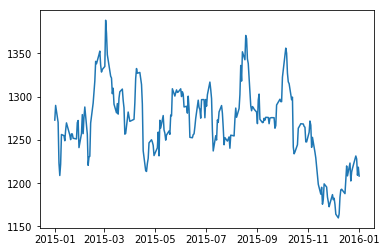

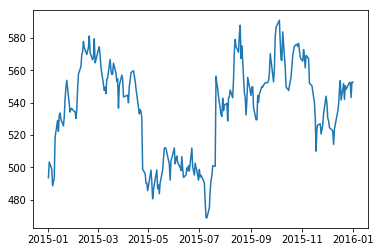

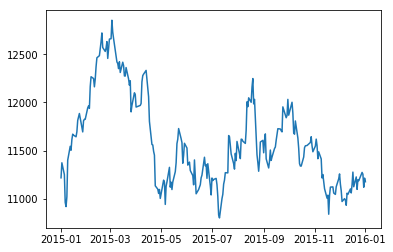

In [8]:
#Code to plot TCS, INFOSYS, NIFTY IT data set using plt(Matplot library)

plt.plot(TCS['Close'])
plt.show()
plt.plot(INFY['Close'])
plt.show()
plt.plot(niftyit['Close'])
plt.show()

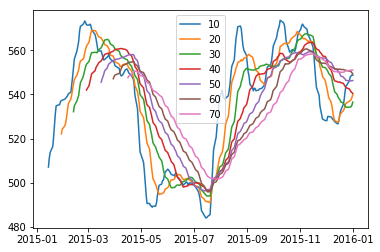

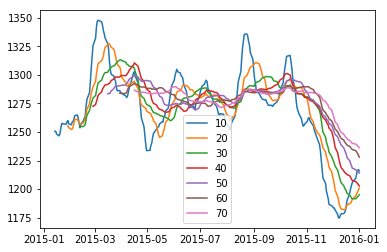

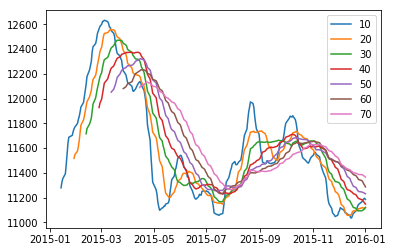

In [10]:
#Answer to the 2nd Question, where rolling window is incremented with 10 steps
#For all the stocks and index dataset.

def time_s(data):
    for i in range(10,80,10):
        data['Rolling_Mean'] = data['Close'].rolling(window = i).mean()
        plt.plot(data['Rolling_Mean'], label = i)
        plt.legend()
    plt.show()
    
time_s(INFY)
time_s(TCS)
time_s(niftyit)

In [12]:
'''Function to generate extra features like Volume Shocks, Price Shocks, Directions and 
   Pricing shock without volume shock.
Volume Shock = 'Vol_Shock'
Price Shock = 'Price_Shock'
Directions for Vol_Shock = 'direc_Vol_Shock'
Directions for Price_Shock = 'direc_Price_Shock'
Pricing shock without volume shock = 'PSWVS'

'''

def dummy_ts(data):
    Vol1 = data.Volume
    Close = data.Close

    data['Vol_Shock'] = np.zeros(len(data), dtype=float)
    data['Price_Shock'] = np.zeros(len(data), dtype=float)
    data['direc_Vol_Shock'] = np.zeros(len(data), dtype=float)
    data['direc_Price_Shock'] = np.zeros(len(data), dtype=float)
    data['PSWVS'] = np.zeros(len(data), dtype=float)
    for i in range(1,len(data)):
        k = ((Vol1[i]-Vol1[i-1])/Vol1[i-1])*100
        if(abs(k)>=10):
            data['Vol_Shock'][i] = 1
            if(k >0):
                data['direc_Vol_Shock'][i] = 1

    for j in range(1,len(data)):
        l = ((Close[j]-Close[j-1])/Close[j-1])*100
        if(abs(l)>=2):
            data['Price_Shock'][j] = 1
            if(l >0):
                data['direc_Price_Shock'][j] = 1
    
    for m in range(1,len(data)):
        if(data['Price_Shock'][m] == 1 and data['Vol_Shock'][m] == 0):
            data['PSWVS'][m] = 1 
            

            
dummy_ts(TCS)
dummy_ts(INFY)
dummy_ts(niftyit)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\anaconda\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\anaconda\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\anaconda\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [15]:
''' Feature extraction code for Volume Shock == 1,
    New DataFrame named N_TCS, N_INFY, N_NIFTYIT is selected, which follows above condition.
    And 2nd DataFrame named Ne_TCS, Ne_INFY, Ne_NIFTYIT is also selected:
    Condition for 2nd DataFrame is PSWVS == 1.
    
'''
N_TCS = TCS[TCS["Vol_Shock"] == 1]
N_INFY = INFY[INFY["Vol_Shock"] == 1]
N_NIFTYIT = niftyit[niftyit["Vol_Shock"] == 1]

Ne_TCS = TCS[TCS["PSWVS"] == 1]
Ne_INFY = INFY[INFY["PSWVS"] == 1]
Ne_NIFTYIT = niftyit[niftyit["PSWVS"] == 1]

In [46]:
#Plot function
def plot_(data,data1,data2):
    #fi,axes = plt.subplots(2,2, figsize=(16,10))
    plt.plot(data['Close'],color = 'blue');
    plt.show()
    plt.plot(data1['Close'], color = 'red');
    plt.show()
    plt.plot(data2['Close'], color = 'black');
    plt.show()

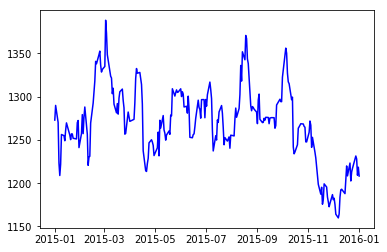

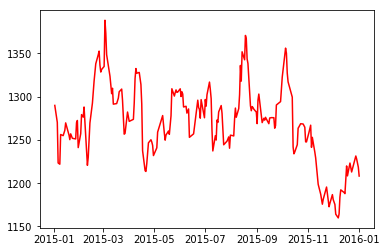

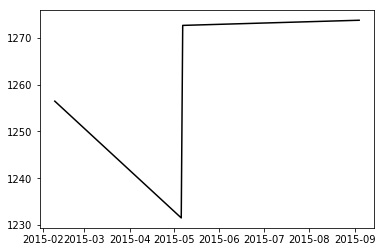

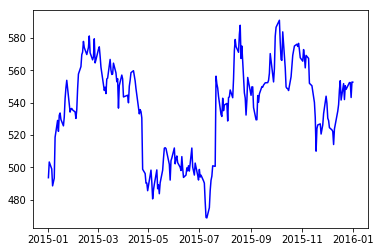

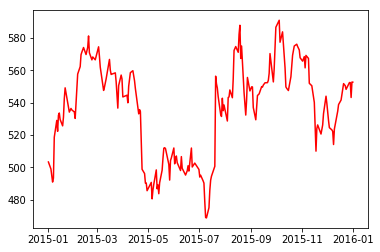

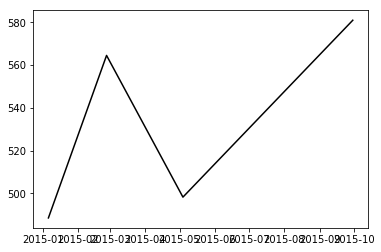

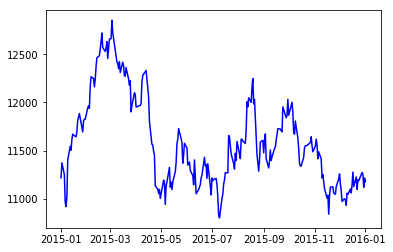

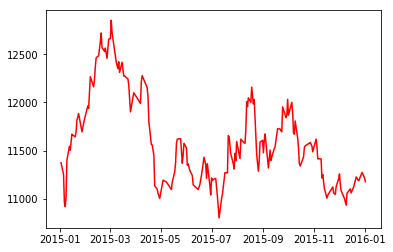

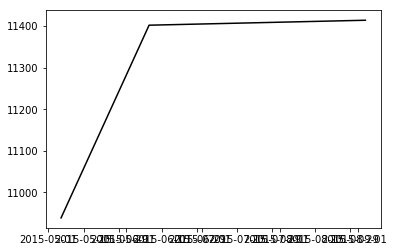

In [47]:
plot_(TCS,N_TCS,Ne_TCS)
plot_(INFY,N_INFY,Ne_INFY)
plot_(niftyit,N_NIFTYIT,Ne_NIFTYIT)